# Analyzing NFL Spread data since 2002
- Data was downloaded from https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data
- Many preprocessing steps were needed to prepare data for analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

### Load and explore datasets

In [3]:
stadiums = pd.read_csv('nfl_data/nfl_stadiums.csv',header=0,encoding='unicode_escape')
teams = pd.read_csv('nfl_data/nfl_teams.csv',header=0)
games = pd.read_csv('nfl_data/spreadspoke_scores.csv',header=0)

In [4]:
stadiums.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,stadium_weather_station,stadium_weather_station_name,stadium_latitude,stadium_longitude,stadium_azimuthangle,stadium_elevation
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.484600,-80.214400,NaN,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,NaN,NaN,29.416944,-98.478889,0.0,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,indoor,65000,Grass,NaN,NaN,36.090750,-115.183722,0.0,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,warm,NaN,NaN,NaN,NaN,30.323889,-81.637500,16.7,6.1


In [5]:
stadiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   stadium_name                     120 non-null    object 
 1   stadium_location                 119 non-null    object 
 2   stadium_open                     90 non-null     float64
 3   stadium_close                    41 non-null     float64
 4   stadium_type                     109 non-null    object 
 5   stadium_address                  102 non-null    object 
 6   stadium_weather_station_zipcode  101 non-null    object 
 7   stadium_weather_type             117 non-null    object 
 8   stadium_capacity                 54 non-null     object 
 9   stadium_surface                  68 non-null     object 
 10  stadium_weather_station          62 non-null     object 
 11  stadium_weather_station_name     63 non-null     object 
 12  stadium_latitude      

In [6]:
#keep relevant stadium variables
stads = stadiums[['stadium_name', 'stadium_type', 'stadium_weather_type', 'stadium_surface']]
stads.head()

,stadium_name,stadium_type,stadium_weather_type,stadium_surface
0,Acrisure Stadium,outdoor,cold,Grass
1,Alamo Dome,indoor,indoor,FieldTurf
2,Allegiant Stadium,indoor,indoor,Grass
3,Allianz Arena,outdoor,moderate,Grass
4,Alltel Stadium,NaN,warm,NaN


In [7]:
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


In [8]:
games = games.dropna(subset=['over_under_line', 'spread_favorite'])
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN


### DataFrame and variable edits

In [9]:
#we will choose to analyze data since the 2002 season
games = games[games['schedule_season'] > 2002]

In [10]:
games['schedule_date'] = pd.to_datetime(games['schedule_date'])
games.sort_values(by=['schedule_date'], inplace=True)
games.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
8139,2003-09-04,2003,1,False,Washington Redskins,16.0,13.0,New York Jets,WAS,-3.0,40,FedEx Field,False,74.0,9.0,89.0,NaN
8153,2003-09-07,2003,1,False,Tennessee Titans,25.0,20.0,Oakland Raiders,TEN,-3.5,46,Nissan Stadium,False,70.0,6.0,72.0,NaN
8152,2003-09-07,2003,1,False,Seattle Seahawks,27.0,10.0,New Orleans Saints,SEA,-3.0,48.5,CenturyLink Field,False,62.0,10.0,81.0,NaN
8151,2003-09-07,2003,1,False,San Francisco 49ers,49.0,7.0,Chicago Bears,SF,-6.5,40.5,Candlestick Park,False,63.0,15.0,75.0,NaN
8149,2003-09-07,2003,1,False,New York Giants,23.0,13.0,St. Louis Rams,LAR,-1.0,46.5,Giants Stadium,False,72.0,6.0,55.0,NaN
8148,2003-09-07,2003,1,False,Miami Dolphins,20.0,21.0,Houston Texans,MIA,-14.0,34.5,Sun Life Stadium,False,82.0,8.0,80.0,NaN
8147,2003-09-07,2003,1,False,Kansas City Chiefs,27.0,14.0,San Diego Chargers,KC,-4.5,47,Arrowhead Stadium,False,70.0,7.0,58.0,NaN
8150,2003-09-07,2003,1,False,Pittsburgh Steelers,34.0,15.0,Baltimore Ravens,PIT,-4.0,38.5,Heinz Field,False,64.0,4.0,71.0,NaN
8145,2003-09-07,2003,1,False,Detroit Lions,42.0,24.0,Arizona Cardinals,DET,-3.5,39,Ford Field,False,72.0,0.0,NaN,indoor
8144,2003-09-07,2003,1,False,Dallas Cowboys,13.0,27.0,Atlanta Falcons,DAL,-2.0,36.5,Texas Stadium,False,75.0,6.0,51.0,NaN


In [11]:
#create day of week and month columns
games['day_of_week'] = games['schedule_date'].dt.day_name()
games['month'] = games['schedule_date'].dt.month_name()

In [12]:
# Mapping of values to be replaced
week_mapping = {
    'Wildcard': 19,
    'Division': 20,
    'Conference': 21,
    'Superbowl': 22
}
# Replace values in the schedule_week column using the mapping
games['schedule_week'] = games['schedule_week'].replace(week_mapping)
# Convert the schedule_week column to a numeric data type (integer)
games['schedule_week'] = pd.to_numeric(games['schedule_week'], errors='coerce')

### Create variables to analyze spreads. We will create variables to analyze straight up results

In [13]:
#create score difference and score total columns, these will be used to decide what side of bet won for each game
games['score_diff'] = games['score_home'] - games['score_away']
games['score_total'] = games['score_home'] + games['score_away']
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,day_of_week,month,score_diff,score_total
8139,2003-09-04,2003,1,False,Washington Redskins,16.0,13.0,New York Jets,WAS,-3.0,...,FedEx Field,False,74.0,9.0,89.0,NaN,Thursday,September,3.0,29.0
8153,2003-09-07,2003,1,False,Tennessee Titans,25.0,20.0,Oakland Raiders,TEN,-3.5,...,Nissan Stadium,False,70.0,6.0,72.0,NaN,Sunday,September,5.0,45.0
8152,2003-09-07,2003,1,False,Seattle Seahawks,27.0,10.0,New Orleans Saints,SEA,-3.0,...,CenturyLink Field,False,62.0,10.0,81.0,NaN,Sunday,September,17.0,37.0
8151,2003-09-07,2003,1,False,San Francisco 49ers,49.0,7.0,Chicago Bears,SF,-6.5,...,Candlestick Park,False,63.0,15.0,75.0,NaN,Sunday,September,42.0,56.0
8149,2003-09-07,2003,1,False,New York Giants,23.0,13.0,St. Louis Rams,LAR,-1.0,...,Giants Stadium,False,72.0,6.0,55.0,NaN,Sunday,September,10.0,36.0


In [14]:
#since spread_favorite is with team_id, we need to map team_id to home_team and away team columns
games['team_home'] = games.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
games['team_away'] = games.team_away.map(teams.set_index('team_name')['team_id'].to_dict())
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,day_of_week,month,score_diff,score_total
8139,2003-09-04,2003,1,False,WAS,16.0,13.0,NYJ,WAS,-3.0,...,FedEx Field,False,74.0,9.0,89.0,NaN,Thursday,September,3.0,29.0
8153,2003-09-07,2003,1,False,TEN,25.0,20.0,LVR,TEN,-3.5,...,Nissan Stadium,False,70.0,6.0,72.0,NaN,Sunday,September,5.0,45.0
8152,2003-09-07,2003,1,False,SEA,27.0,10.0,NO,SEA,-3.0,...,CenturyLink Field,False,62.0,10.0,81.0,NaN,Sunday,September,17.0,37.0
8151,2003-09-07,2003,1,False,SF,49.0,7.0,CHI,SF,-6.5,...,Candlestick Park,False,63.0,15.0,75.0,NaN,Sunday,September,42.0,56.0
8149,2003-09-07,2003,1,False,NYG,23.0,13.0,LAR,LAR,-1.0,...,Giants Stadium,False,72.0,6.0,55.0,NaN,Sunday,September,10.0,36.0


In [15]:
#change spread favorite to be positive when team is home (since our score difference is home - away)
games['spread_favorite'] = np.where(games['team_favorite_id'] == games['team_home'], np.abs(games['spread_favorite']), games['spread_favorite'])

In [16]:
#create straight up winner and loser column
games['winner'] = np.where(games['score_home'] >= games['score_away'], games['team_home'], games['team_away'])
games['loser'] = np.where(games['score_home'] >= games['score_away'], games['team_away'], games['team_home'])
#account for ties
games.loc[games['score_diff']==0, 'winner']= 'TIE'
games.loc[games['score_diff']==0, 'loser']= 'TIE'

In [17]:
#create spread winner and losers
games['spread_winner'] = np.where(games['spread_favorite'] > games['score_diff'], games['team_away'], games['team_home'])
games['spread_loser'] = np.where(games['spread_favorite'] < games['score_diff'], games['team_away'], games['team_home'])
#account for push
games.loc[games['score_diff']==games['spread_favorite'], 'spread_winner']= 'PUSH'
games.loc[games['score_diff']==games['spread_favorite'], 'spread_loser']= 'PUSH'

In [18]:
#create over_under winner
games['over_under_line'] = pd.to_numeric(games['over_under_line'], errors='coerce')
games['over_under_winner'] = np.where(games['score_total'] > games['over_under_line'], 'OVER', 'UNDER')
games.loc[games['score_total'] == games['over_under_line'], 'over_under_winner']= 'PUSH'


In [19]:
#create ou line - score_difference column
games['over_under_diff'] = games['score_total'] - games['over_under_line']

In [20]:
#drop schedule_date column since we no longer need it
games.reset_index(drop=True, inplace=True)
games.drop(columns=['schedule_date'], inplace=True)

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_season      5455 non-null   int64  
 1   schedule_week        5455 non-null   int64  
 2   schedule_playoff     5455 non-null   bool   
 3   team_home            5455 non-null   object 
 4   score_home           5455 non-null   float64
 5   score_away           5455 non-null   float64
 6   team_away            5455 non-null   object 
 7   team_favorite_id     5455 non-null   object 
 8   spread_favorite      5455 non-null   float64
 9   over_under_line      5455 non-null   float64
 10  stadium              5455 non-null   object 
 11  stadium_neutral      5455 non-null   bool   
 12  weather_temperature  4638 non-null   float64
 13  weather_wind_mph     4633 non-null   float64
 14  weather_humidity     2111 non-null   float64
 15  weather_detail       1619 non-null   o

### Perform some EDA

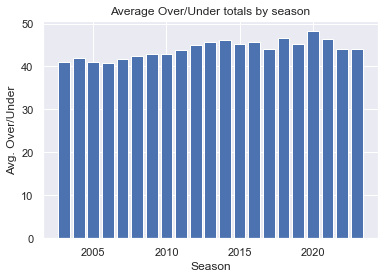

In [22]:
#calculate average over/under by season
ou_season = pd.DataFrame(games.groupby('schedule_season')['over_under_line'].mean())
plt.bar(ou_season.index, ou_season['over_under_line'])
plt.xlabel("Season")
plt.ylabel("Avg. Over/Under")
plt.title("Average Over/Under totals by season")
plt.show()

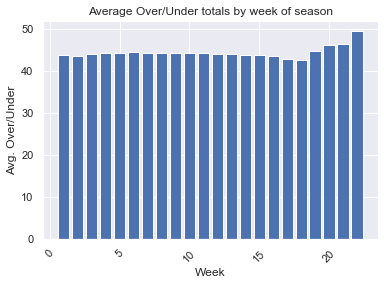

In [23]:
#calculate average over/under by week
ou_week = pd.DataFrame(games.groupby('schedule_week')['over_under_line'].mean())
plt.bar(ou_week.index, ou_week['over_under_line'])
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.ylabel("Avg. Over/Under")
plt.title("Average Over/Under totals by week of season")
plt.show()

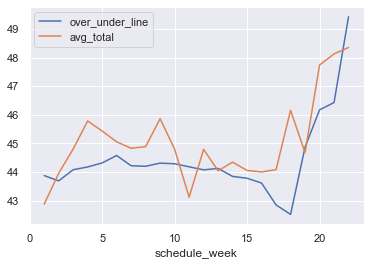

In [24]:
#calculate average over/under by week
ou_week = pd.DataFrame(games.groupby('schedule_week')['over_under_line'].mean())
tot_week = pd.DataFrame(games.groupby('schedule_week')['score_total'].mean())
ou_week['avg_total'] = tot_week['score_total']

ou_week.plot(y = ['over_under_line', 'avg_total'], use_index=True)
plt.show()

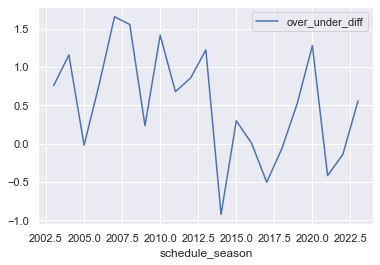

In [25]:
ou_diff_season = pd.DataFrame(games.groupby('schedule_season')['over_under_diff'].mean())
ou_diff_season.plot(y = ['over_under_diff'], use_index=True)
plt.show()

### Create variables to analyze spread

### Calculate records to analyze spreads and over/unders

#### Over Unders overall

In [26]:
games['over_under_winner'].value_counts()

UNDER    2742
OVER     2619
PUSH       94
Name: over_under_winner, dtype: int64

#### Calculate how favorites have done against the spread

In [27]:
# calculate how favorites have done against the spread
fav_wins = 0
fav_losses = 0

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['spread_winner']:
        fav_wins += 1
    elif row['team_favorite_id'] == row['spread_loser']:
        fav_losses += 1

In [28]:
pushes = len(games[games['spread_winner'] == 'PUSH'])

In [29]:
print(fav_wins, fav_losses, pushes)

2561 2704 157


#### Calculate how favorites have done straight up

In [30]:
# calculate how favorites have done straight up
fav_wins_st = 0
fav_losses_st = 0

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['winner']:
        fav_wins_st += 1
    elif row['team_favorite_id'] == row['loser']:
        fav_losses_st += 1

pushes_st = len(games[games['winner'] == 'TIE'])

In [31]:
print(fav_wins_st, fav_losses_st, pushes_st)

3597 1812 13


#### Calculate how home teams have done straight up

In [32]:
# calculate how home teams have done straight up
home_wins_st = 0
home_losses_st = 0

for index, row in games.iterrows():
    if row['team_home'] == row['winner']:
        home_wins_st += 1
    elif row['team_home'] == row['loser']:
        home_losses_st += 1

ties_st = len(games[games['winner'] == 'TIE'])

In [33]:
print(home_wins_st, home_losses_st, ties_st)

3065 2377 13


#### Calculate how home teams have done against the spread

In [34]:
# calculate how home teams have done against the spread
home_wins_sp = 0
home_losses_sp = 0

for index, row in games.iterrows():
    if row['team_home'] == row['spread_winner']:
        home_wins_sp += 1
    elif row['team_home'] == row['spread_loser']:
        home_losses_sp += 1

home_ties_sp = len(games[games['spread_winner'] == 'PUSH'])

In [35]:
print(home_wins_sp, home_losses_sp, home_ties_sp)

2578 2720 157


#### Calculate how home favorites have done straight up

In [36]:
# calculate how home favorites have done straight up
home_fav_wins_st = 0
home_fav_losses_st = 0
home_fav_ties_st = 0

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_home']:
        if row['team_home'] == row['winner']:
            home_fav_wins_st += 1
        elif row['team_home'] == row['loser']:
            home_fav_losses_st += 1

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_home']:
        if row['winner'] == 'TIE':
            home_fav_ties_st += 1

In [37]:
print(home_fav_wins_st, home_fav_losses_st, home_fav_ties_st)

2397 1160 7


#### Calculate how home favorites have done against the spread

In [38]:
# calculate how home favorites have done against the spread
home_fav_wins_sp = 0
home_fav_losses_sp = 0
home_fav_ties_sp = 0

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_home']:
        if row['team_home'] == row['spread_winner']:
            home_fav_wins_sp += 1
        elif row['team_home'] == row['spread_loser']:
            home_fav_losses_sp += 1

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_home']:
        if row['spread_winner'] == 'PUSH':
            home_fav_ties_sp += 1

In [39]:
print(home_fav_wins_sp, home_fav_losses_sp, home_fav_ties_sp)

1661 1803 100


#### Calculate how home dogs have done straight up

In [40]:
# calculate how home dogs have done straight up
home_dog_wins_st = 0
home_dog_losses_st = 0
home_dog_ties_st = 0

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_away']:
        if row['team_home'] == row['winner']:
            home_dog_wins_st += 1
        elif row['team_home'] == row['loser']:
            home_dog_losses_st += 1

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_away']:
        if row['winner'] == 'TIE':
            home_dog_ties_st += 1

In [41]:
print(home_dog_wins_st, home_dog_losses_st, home_dog_ties_st)

652 1200 6


#### Calculate how home dogs have done against the spread

In [42]:
# calculate how home dogs have done against the spread
home_dog_wins_sp = 0
home_dog_losses_sp = 0
home_dog_ties_sp = 0

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_away']:
        if row['team_home'] == row['spread_winner']:
            home_dog_wins_sp += 1
        elif row['team_home'] == row['spread_loser']:
            home_dog_losses_sp += 1

for index, row in games.iterrows():
    if row['team_favorite_id'] == row['team_away']:
        if row['spread_winner'] == 'PUSH':
            home_dog_ties_sp += 1

In [43]:
print(home_dog_wins_sp, home_dog_losses_sp, home_dog_ties_sp)

901 900 57


#### Calculate how each team has done relative to spread

In [44]:
#calculate how teams have done relative to spread
team_spreads = pd.DataFrame(games['spread_winner'].value_counts())
team_loss = pd.DataFrame(games['spread_loser'].value_counts())
team_spreads['spread_loser'] = team_loss['spread_loser']
team_spreads['pct'] = team_spreads['spread_winner'] / (team_spreads['spread_winner']+team_spreads['spread_loser'])
team_spreads

,spread_winner,spread_loser,pct
NE,207,150,0.579832
GB,190,150,0.558824
IND,184,157,0.539589
PIT,180,160,0.529412
KC,177,167,0.514535
NO,177,162,0.522124
SEA,176,165,0.516129
CIN,175,149,0.540123
LAC,173,157,0.524242
PHI,172,174,0.497110


#### Calculate how each team has done with Over/Unders

In [45]:
# Create a list of unique team names
teams = games['team_home'].append(games['team_away']).unique()

# Create an empty DataFrame to store the results
team_results = pd.DataFrame({'Team': teams})

# Initialize counts for OVER, UNDER, and PUSH
team_results['OVER'] = 0
team_results['UNDER'] = 0
team_results['PUSH'] = 0

# Loop through the DataFrame and update counts for each team
for index, row in games.iterrows():
    team_home = row['team_home']
    team_away = row['team_away']
    result = row['over_under_winner']
    
    # Increment counts for both home_team and away_team
    team_results.loc[team_results['Team'] == team_home, result] += 1
    team_results.loc[team_results['Team'] == team_home, result] += 1

team_ou = pd.DataFrame(team_results)
team_ou['over_pct'] = team_ou['OVER'] / (team_ou['OVER']+team_ou['UNDER'])
team_ou = team_ou.sort_values(by='over_pct', ascending=False)
team_ou

/var/folders/vv/5y3czrp10w7dkbkrzmk_d70m0000gn/T/ipykernel_58304/3974366759.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teams = games['team_home'].append(games['team_away']).unique()


,Team,OVER,UNDER,PUSH,over_pct
8,DET,180,146,2,0.552147
9,DAL,182,152,4,0.544910
1,TEN,174,146,12,0.543750
20,LVR,168,144,14,0.538462
21,NO,182,162,0,0.529070
7,PIT,184,164,4,0.528736
14,GB,184,168,2,0.522727
28,NE,192,178,12,0.518919
26,ARI,172,162,4,0.514970
13,BUF,172,164,2,0.511905


### Create dataframe by season to analyze by season now

In [62]:
#create dataframes by season
season_dfs = {}
for year in games['schedule_season']:
    season_dfs[f'games{year}']= games[games['schedule_season']==year]

In [64]:
season_dfs['games2023']

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,day_of_week,month,score_diff,score_total,winner,loser,spread_winner,spread_loser,over_under_winner,over_under_diff
5377,2023,1,False,KC,20.0,21.0,DET,KC,4.5,53.0,...,Thursday,September,-1.0,41.0,DET,KC,DET,KC,UNDER,-12.0
5378,2023,1,False,WAS,20.0,16.0,ARI,WAS,7.0,38.0,...,Sunday,September,4.0,36.0,WAS,ARI,ARI,WAS,UNDER,-2.0
5379,2023,1,False,SEA,13.0,30.0,LAR,SEA,5.0,46.0,...,Sunday,September,-17.0,43.0,LAR,SEA,LAR,SEA,UNDER,-3.0
5380,2023,1,False,PIT,7.0,30.0,SF,SF,-2.0,41.5,...,Sunday,September,-23.0,37.0,SF,PIT,SF,PIT,UNDER,-4.5
5381,2023,1,False,NYG,0.0,40.0,DAL,DAL,-3.5,45.0,...,Sunday,September,-40.0,40.0,DAL,NYG,DAL,NYG,UNDER,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,2023,5,False,BUF,20.0,25.0,JAX,BUF,5.0,48.5,...,Sunday,October,-5.0,45.0,JAX,BUF,JAX,BUF,UNDER,-3.5
5451,2023,5,False,ATL,21.0,19.0,HOU,ATL,2.5,42.0,...,Sunday,October,2.0,40.0,ATL,HOU,HOU,ATL,UNDER,-2.0
5452,2023,5,False,ARI,20.0,34.0,CIN,CIN,-3.0,45.0,...,Sunday,October,-14.0,54.0,CIN,ARI,CIN,ARI,OVER,9.0
5453,2023,5,False,IND,23.0,16.0,TEN,TEN,-2.5,43.5,...,Sunday,October,7.0,39.0,IND,TEN,IND,TEN,UNDER,-4.5


#### Calculate Over/Unders by season:

In [58]:
# Create an empty dictionary to store the results for each season
season_over_under_results = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    over_counts = df['over_under_winner'].value_counts()
    over_wins = over_counts[1]
    under_wins = over_counts[0]
    if len(over_counts) >2:
        pushes = over_counts[2]
    else:
        pushes = 0
    
    over_pct = over_wins / (over_wins + under_wins)

    season_over_under_results[year] = (over_wins, under_wins, pushes, over_pct)

# Convert season_over_under_results to a DataFrame
over_under_results = pd.DataFrame(season_over_under_results).T
over_under_results.columns = ['over', 'under', 'pushes', 'over_pct']
over_under_results.index.name = 'Year'
#over_under_results.index = [int(year[5:]) for year in over_under_results.index]  # Extracting years
over_under_results = over_under_results[::-1]

print("Over/Under Results by year")
print(over_under_results)


Over/Under Results by year
            over  under  pushes  over_pct
Year                                     
games2023   34.0   44.0     0.0  0.435897
games2022  125.0  156.0     3.0  0.444840
games2021  129.0  153.0     3.0  0.457447
games2020  128.0  132.0     9.0  0.492308
games2019  132.0  133.0     2.0  0.498113
games2018  124.0  140.0     3.0  0.469697
games2017  121.0  145.0     1.0  0.454887
games2016  122.0  140.0     5.0  0.465649
games2015  124.0  139.0     4.0  0.471483
games2014  123.0  140.0     4.0  0.467681
games2013  128.0  133.0     6.0  0.490421
games2012  129.0  133.0     5.0  0.492366
games2011  130.0  132.0     5.0  0.496183
games2010  117.0  146.0     4.0  0.444867
games2009  124.0  137.0     6.0  0.475096
games2008  129.0  130.0     8.0  0.498069
games2007  120.0  141.0     6.0  0.459770
games2006  128.0  132.0     7.0  0.492308
games2005  119.0  142.0     6.0  0.455939
games2004  130.0  134.0     3.0  0.492424
games2003  125.0  138.0     4.0  0.475285


In [61]:
recent_years = over_under_results.loc[['games2023','games2023']]

# Calculate the average of all rows in the original DataFrame
average_data = over_under_results.mean()

# Create a new DataFrame with the recent years and the average
new_dataframe = pd.concat([recent_years, average_data.to_frame().T])

# Set a custom index for the new DataFrame
new_dataframe.index = ['2022', '2023', '20 year Average']

# Print the new DataFrame
print(new_dataframe)

          over       under   pushes  over_pct
2022      34.0   44.000000  0.00000  0.435897
2023      34.0   44.000000  0.00000  0.435897
Average  121.0  134.285714  4.47619  0.472892


#### plot avg. total vs avg over_under_line for last 4 seasons

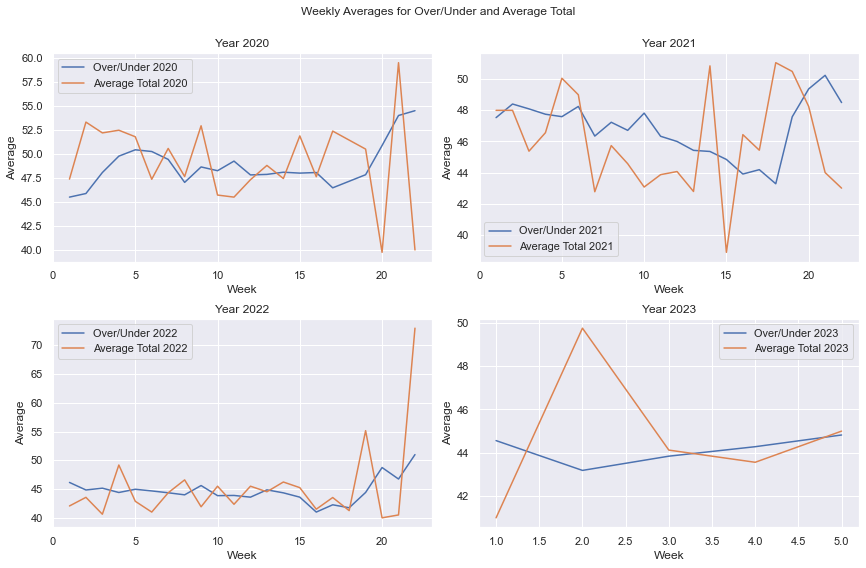

In [48]:
# Plot most recent 4 years to analyze
years = range(2020, 2024)

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Weekly Averages for Over/Under and Average Total')

# Iterate over the years and create dataframes and subplots for each year
for i, year in enumerate(years):
    season_dfs[year] = games[games['schedule_season'] == year]

    ou_week = season_dfs[year].groupby('schedule_week')['over_under_line'].mean()
    tot_week = season_dfs[year].groupby('schedule_week')['score_total'].mean()

    row, col = i // 2, i % 2  # Determine the row and column for the subplot

    # Plot the weekly averages for Over/Under and Average Total on the current subplot
    axes[row, col].plot(ou_week, label=f'Over/Under {year}')
    axes[row, col].plot(tot_week, label=f'Average Total {year}')
    axes[row, col].set_title(f'Year {year}')
    axes[row, col].set_xlabel('Week')
    axes[row, col].set_ylabel('Average')
    axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

In [65]:
df23 = season_dfs['games2023']
ou_week23 = pd.DataFrame(df23.groupby('schedule_week')['over_under_line'].mean())
tot_week23 = pd.DataFrame(df23.groupby('schedule_week')['score_total'].mean())
ou_week23['avg_total'] = tot_week23['score_total']

In [66]:
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ou_week23.index, ou_week23['over_under_line'], label='Over/Under 2023', color='blue')
ax.plot(ou_week23.index, ou_week23['avg_total'], label='Average Total 2023', color='red')
ax.set_xlabel('Schedule Week')
ax.set_ylabel('Average')
ax.set_title('Weekly Averages for Over/Under and Average Total in 2023')
ax.legend()

KeyError: 'schedule_week'

<Figure size 576x432 with 0 Axes>

#### Calcuate how favorites have done against the spread for each season

In [49]:
#calculate how favorites have done against the spread for each season
season_favorite_results = {}
# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    # Calculate how favorites have done against the spread for the current season
    fav_wins = len(df[df['team_favorite_id'] == df['spread_winner']])
    fav_losses = len(df[df['team_favorite_id'] == df['spread_loser']])
    pushes = len(df[df['spread_winner'] == 'PUSH'])

    season_favorite_results[year] = (fav_wins, fav_losses, pushes)

In [50]:
years = games['schedule_season'].unique()

In [51]:
fav_results_sp = pd.DataFrame(season_favorite_results).T
fav_results_sp.columns = ['win', 'loss', 'push']
fav_results_sp['fav_cover_pct'] = fav_results_sp['win'] / (fav_results_sp['win'] + fav_results_sp['loss'])
fav_results_sp.index.name = 'Favorites against the spread'
fav_results_sp.index = years
fav_results_sp = fav_results_sp[::-1]
print("Favorites Against the Spread by Year:")
fav_results_sp

ValueError: Length mismatch: Expected axis has 25 elements, new values have 21 elements

#### Calculate how favorites have done straight up for each season.

In [ ]:
# Create an empty dictionary to store the results for each season
season_favorite_results_st = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    # Calculate how favorites have done straight up for the current season
    fav_wins_st = len(df[df['team_favorite_id'] == df['winner']])
    fav_losses_st = len(df[df['team_favorite_id'] == df['loser']])
    pushes_st = len(df[df['winner'] == 'TIE'])

    season_favorite_results_st[year] = (fav_wins_st, fav_losses_st, pushes_st)

# Convert season_favorite_results_st to a DataFrame
fav_results_st = pd.DataFrame(season_favorite_results_st).T
fav_results_st.columns = ['win', 'loss', 'tie']
fav_results_st.index.name = 'Favorites Straight Up'
fav_results_st['fav_win_pct'] = fav_results_st['win'] / (fav_results_st['win'] + fav_results_st['loss'])
fav_results_st.index = years
fav_results_st = fav_results_st[::-1]


print("Favorites Straight up by year")
fav_results_st

Favorites Straight up by year


,win,loss,tie,fav_win_pct
2023,48,29,0,0.623377
2022,187,95,2,0.663121
2021,181,103,1,0.637324
2020,182,86,1,0.679104
2019,172,94,1,0.646617
2018,174,91,2,0.656604
2017,181,85,0,0.680451
2016,175,88,2,0.665399
2015,164,99,0,0.623574
2014,179,87,1,0.672932


#### Calculate how home teams have done straight up each season

In [ ]:
# Create an empty dictionary to store the results for each season
season_home_results_st = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    # Calculate how home teams have done straight up for season
    home_wins_st = len(df[df['team_home'] == df['winner']])
    home_losses_st = len(df[df['team_home'] == df['loser']])
    home_pushes_st = len(df[df['winner'] == 'TIE'])

    season_home_results_st[year] = (home_wins_st, home_losses_st, home_pushes_st)

# Convert season_home_results_sp to a DataFrame
home_results_st = pd.DataFrame(season_home_results_st).T
home_results_st.columns = ['win', 'loss', 'tie']
home_results_st['home_win_pct'] = home_results_st['win'] / (home_results_st['win'] + home_results_st['loss'])
home_results_st.index.name = 'Home Teams Straight Up'
home_results_st.index = years
home_results_st = home_results_st[::-1]

print("Home Teams Against the Spread by year")
print(home_results_st)

Home Teams Against the Spread by year
      win  loss  tie  home_win_pct
2023   37    41    0      0.474359
2022  160   122    2      0.567376
2021  147   137    1      0.517606
2020  134   134    1      0.500000
2019  139   127    1      0.522556
2018  158   107    2      0.596226
2017  152   115    0      0.569288
2016  155   110    2      0.584906
2015  145   122    0      0.543071
2014  153   113    1      0.575188
2013  159   107    1      0.597744
2012  152   114    1      0.571429
2011  153   114    0      0.573034
2010  148   119    0      0.554307
2009  153   114    0      0.573034
2008  151   115    1      0.567669
2007  152   115    0      0.569288
2006  145   122    0      0.543071
2005  157   110    0      0.588015
2004  151   116    0      0.565543
2003  164   103    0      0.614232


#### Calculate how home teams have done against spread each season

In [ ]:
# Create an empty dictionary to store the results for each season
season_home_results_sp = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    # Calculate how home teams have done against the spread for the current season
    home_wins_sp = len(df[df['team_home'] == df['spread_winner']])
    home_losses_sp = len(df[df['team_home'] == df['spread_loser']])
    home_pushes_sp = len(df[df['spread_winner'] == 'PUSH'])

    season_home_results_sp[year] = (home_wins_sp, home_losses_sp, home_pushes_sp)

# Convert season_home_results_sp to a DataFrame
home_results_sp = pd.DataFrame(season_home_results_sp).T
home_results_sp.columns = ['win', 'loss', 'push']
home_results_sp['home_cover_pct'] = home_results_sp['win'] / (home_results_sp['win'] + home_results_sp['loss'])
home_results_sp.index.name = 'Home Teams Against the Spread'
home_results_sp.index = years
home_results_sp = home_results_sp[::-1]

print("Home Teams Against the Spread by year")
print(home_results_sp)

Home Teams Against the Spread by year
      win  loss  push  home_cover_pct
2023   33    41     4        0.445946
2022  138   138     8        0.500000
2021  132   147     6        0.473118
2020  130   133     6        0.494297
2019  115   143     9        0.445736
2018  122   137     8        0.471042
2017  128   128    11        0.500000
2016  131   128     8        0.505792
2015  121   136    10        0.470817
2014  127   134     6        0.486590
2013  135   122    10        0.525292
2012  127   136     4        0.482890
2011  129   128    10        0.501946
2010  129   133     5        0.492366
2009  122   137     8        0.471042
2008  119   142     6        0.455939
2007  132   127     8        0.509653
2006  128   134     5        0.488550
2005  128   129    10        0.498054
2004  122   139     6        0.467433
2003  130   128     9        0.503876


#### Calculate how home favorites have done straight up each season

In [ ]:
# Create an empty dictionary to store the results for each season
season_home_fav_results_st = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    home_fav_wins_st = 0
    home_fav_losses_st = 0
    home_fav_ties_st = 0

    for index, row in df.iterrows():
        if row['team_favorite_id'] == row['team_home']:
            if row['team_home'] == row['winner']:
                home_fav_wins_st += 1
            elif row['team_home'] == row['loser']:
                home_fav_losses_st += 1

        if row['team_favorite_id'] == row['team_home']:
            if row['winner'] == 'TIE':
                home_fav_ties_st += 1

    win_pct = home_fav_wins_st / (home_fav_wins_st + home_fav_losses_st)

    season_home_fav_results_st[year] = (home_fav_wins_st, home_fav_losses_st, home_fav_ties_st, win_pct)

# Convert season_home_fav_results_st to a DataFrame
home_fav_results_st = pd.DataFrame(season_home_fav_results_st).T
home_fav_results_st.columns = ['win', 'loss', 'tie', 'home_fav_win_pct']
home_fav_results_st.index.name = 'Home Favorites Straight Up'
home_fav_results_st.index = [int(year[5:]) for year in home_fav_results_st.index]  # Extracting years
home_fav_results_st = home_fav_results_st[::-1]

print("Home Favorites Straight Up by year")
print(home_fav_results_st)

Home Favorites Straight Up by year
        win  loss  tie  home_fav_win_pct
2023   28.0  20.0  0.0          0.583333
2022  123.0  58.0  0.0          0.679558
2021  108.0  64.0  1.0          0.627907
2020  102.0  54.0  1.0          0.653846
2019  106.0  61.0  0.0          0.634731
2018  123.0  56.0  0.0          0.687151
2017  114.0  47.0  0.0          0.708075
2016  122.0  56.0  2.0          0.685393
2015  108.0  63.0  0.0          0.631579
2014  124.0  58.0  1.0          0.681319
2013  123.0  49.0  1.0          0.715116
2012  114.0  56.0  1.0          0.670588
2011  119.0  57.0  0.0          0.676136
2010  114.0  61.0  0.0          0.651429
2009  123.0  53.0  0.0          0.698864
2008  126.0  60.0  0.0          0.677419
2007  119.0  53.0  0.0          0.691860
2006  113.0  72.0  0.0          0.610811
2005  135.0  48.0  0.0          0.737705
2004  121.0  59.0  0.0          0.672222
2003  132.0  55.0  0.0          0.705882


#### Calculate how home favorites have done against the spread each season

In [ ]:
# Create an empty dictionary to store the results for each season
season_home_fav_results_sp = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    home_fav_wins_sp = 0
    home_fav_losses_sp = 0
    home_fav_ties_sp = 0

    for index, row in df.iterrows():
        if row['team_favorite_id'] == row['team_home']:
            if row['team_home'] == row['spread_winner']:
                home_fav_wins_sp += 1
            elif row['team_home'] == row['spread_loser']:
                home_fav_losses_sp += 1

        if row['team_favorite_id'] == row['team_home']:
            if row['spread_winner'] == 'PUSH':
                home_fav_ties_sp += 1

    win_pct_sp = home_fav_wins_sp / (home_fav_wins_sp + home_fav_losses_sp)

    season_home_fav_results_sp[year] = (home_fav_wins_sp, home_fav_losses_sp, home_fav_ties_sp, win_pct_sp)

# Convert season_home_fav_results_sp to a DataFrame
home_fav_results_sp = pd.DataFrame(season_home_fav_results_sp).T
home_fav_results_sp.columns = ['win', 'loss', 'tie', 'home_fav_cover_pct']
home_fav_results_sp.index.name = 'Home Favorites Against the Spread'
home_fav_results_sp.index = years
home_fav_results_sp = home_fav_results_sp[::-1]

print("Home Favorites Against the Spread by year")
print(home_fav_results_sp)

Home Favorites Against the Spread by year
       win   loss  tie  home_fav_cover_pct
2023  21.0   25.0  2.0            0.456522
2022  83.0   94.0  4.0            0.468927
2021  78.0   90.0  5.0            0.464286
2020  70.0   84.0  3.0            0.454545
2019  70.0   91.0  6.0            0.434783
2018  77.0   96.0  6.0            0.445087
2017  79.0   78.0  4.0            0.503185
2016  93.0   83.0  4.0            0.528409
2015  72.0   92.0  7.0            0.439024
2014  85.0   94.0  4.0            0.474860
2013  88.0   81.0  4.0            0.520710
2012  79.0   90.0  2.0            0.467456
2011  81.0   88.0  7.0            0.479290
2010  83.0   90.0  2.0            0.479769
2009  79.0   90.0  7.0            0.467456
2008  84.0   98.0  4.0            0.461538
2007  84.0   80.0  8.0            0.512195
2006  82.0  100.0  3.0            0.450549
2005  99.0   77.0  7.0            0.562500
2004  84.0   92.0  4.0            0.477273
2003  90.0   90.0  7.0            0.500000


#### Calculate how home underdogs have done straight up per season

In [ ]:
# Create an empty dictionary to store the results for each season
season_home_dog_results_st = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    home_dog_wins_st = 0
    home_dog_losses_st = 0
    home_dog_ties_st = 0

    for index, row in df.iterrows():
        if row['team_favorite_id'] == row['team_away']:
            if row['team_home'] == row['winner']:
                home_dog_wins_st += 1
            elif row['team_home'] == row['loser']:
                home_dog_losses_st += 1

        if row['team_favorite_id'] == row['team_away']:
            if row['winner'] == 'TIE':
                home_dog_ties_st += 1

    win_pct_st = home_dog_wins_st / (home_dog_wins_st + home_dog_losses_st)

    season_home_dog_results_st[year] = (home_dog_wins_st, home_dog_losses_st, home_dog_ties_st, win_pct_st)

# Convert season_home_dog_results_st to a DataFrame
home_dog_results_st = pd.DataFrame(season_home_dog_results_st).T
home_dog_results_st.columns = ['win', 'loss', 'tie', 'home_dog_win_pct']
home_dog_results_st.index.name = 'Home Underdogs Straight Up'
home_dog_results_st.index = [int(year[5:]) for year in home_dog_results_st.index]  # Extracting years
home_dog_results_st = home_dog_results_st[::-1]

print("Home Underdogs Straight Up by year")
print(home_dog_results_st)


Home Underdogs Straight Up by year
       win  loss  tie  home_dog_win_pct
2023   9.0  20.0  0.0          0.310345
2022  37.0  64.0  2.0          0.366337
2021  39.0  73.0  0.0          0.348214
2020  32.0  80.0  0.0          0.285714
2019  33.0  66.0  1.0          0.333333
2018  35.0  51.0  2.0          0.406977
2017  38.0  67.0  0.0          0.361905
2016  32.0  53.0  0.0          0.376471
2015  36.0  56.0  0.0          0.391304
2014  29.0  55.0  0.0          0.345238
2013  34.0  58.0  0.0          0.369565
2012  37.0  57.0  0.0          0.393617
2011  34.0  57.0  0.0          0.373626
2010  30.0  57.0  0.0          0.344828
2009  30.0  61.0  0.0          0.329670
2008  25.0  55.0  1.0          0.312500
2007  31.0  62.0  0.0          0.333333
2006  32.0  48.0  0.0          0.400000
2005  20.0  59.0  0.0          0.253165
2004  29.0  54.0  0.0          0.349398
2003  30.0  47.0  0.0          0.389610


#### Calculate how home underdogs have done against the spread per season

In [ ]:
# Create an empty dictionary to store the results for each season
season_home_dog_results_sp = {}

# Iterate through the dataframes in season_dfs
for year, df in season_dfs.items():
    home_dog_wins_sp = 0
    home_dog_losses_sp = 0
    home_dog_ties_sp = 0

    for index, row in df.iterrows():
        if row['team_favorite_id'] == row['team_away']:
            if row['team_home'] == row['spread_winner']:
                home_dog_wins_sp += 1
            elif row['team_home'] == row['spread_loser']:
                home_dog_losses_sp += 1

        if row['team_favorite_id'] == row['team_away']:
            if row['spread_winner'] == 'PUSH':
                home_dog_ties_sp += 1

    win_pct_sp = home_dog_wins_sp / (home_dog_wins_sp + home_dog_losses_sp)

    season_home_dog_results_sp[year] = (home_dog_wins_sp, home_dog_losses_sp, home_dog_ties_sp, win_pct_sp)

# Convert season_home_dog_results_sp to a DataFrame
home_dog_results_sp = pd.DataFrame(season_home_dog_results_sp).T
home_dog_results_sp.columns = ['win', 'loss', 'tie', 'home_dog_cover_pct']
home_dog_results_sp.index.name = 'Home Underdogs Against the Spread'
home_dog_results_sp.index = [int(year[5:]) for year in home_dog_results_sp.index]  # Extracting years
home_dog_results_sp = home_dog_results_sp[::-1]

print("Home Underdogs Against the Spread by year")
print(home_dog_results_sp)


Home Underdogs Against the Spread by year
       win  loss  tie  home_dog_cover_pct
2023  12.0  15.0  2.0            0.444444
2022  55.0  44.0  4.0            0.555556
2021  54.0  57.0  1.0            0.486486
2020  60.0  49.0  3.0            0.550459
2019  45.0  52.0  3.0            0.463918
2018  45.0  41.0  2.0            0.523256
2017  49.0  49.0  7.0            0.500000
2016  37.0  44.0  4.0            0.456790
2015  48.0  41.0  3.0            0.539326
2014  42.0  40.0  2.0            0.512195
2013  45.0  41.0  6.0            0.523256
2012  47.0  45.0  2.0            0.510870
2011  48.0  40.0  3.0            0.545455
2010  42.0  42.0  3.0            0.500000
2009  43.0  47.0  1.0            0.477778
2008  35.0  44.0  2.0            0.443038
2007  46.0  47.0  0.0            0.494624
2006  46.0  32.0  2.0            0.589744
2005  27.0  49.0  3.0            0.355263
2004  37.0  44.0  2.0            0.456790
2003  38.0  37.0  2.0            0.506667


In [ ]:
season_dfs[2022]

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,day_of_week,month,score_diff,score_total,winner,loser,spread_winner,spread_loser,over_under_winner,over_under_diff
5093,2022,1,False,LAR,10.0,31.0,BUF,BUF,-2.0,52.0,...,Thursday,September,-21.0,41.0,BUF,LAR,BUF,LAR,UNDER,-11.0
5094,2022,1,False,LAC,24.0,19.0,LVR,LAC,3.5,52.5,...,Sunday,September,5.0,43.0,LAC,LVR,LAC,LVR,UNDER,-9.5
5095,2022,1,False,TEN,20.0,21.0,NYG,TEN,5.5,44.0,...,Sunday,September,-1.0,41.0,NYG,TEN,NYG,TEN,UNDER,-3.0
5096,2022,1,False,NYJ,9.0,24.0,BAL,BAL,-6.5,44.0,...,Sunday,September,-15.0,33.0,BAL,NYJ,BAL,NYJ,UNDER,-11.0
5097,2022,1,False,MIN,23.0,7.0,GB,MIN,2.0,46.5,...,Sunday,September,16.0,30.0,MIN,GB,MIN,GB,UNDER,-16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,2022,20,True,BUF,10.0,27.0,CIN,BUF,6.0,48.5,...,Sunday,January,-17.0,37.0,CIN,BUF,CIN,BUF,UNDER,-11.5
5373,2022,20,True,SF,19.0,12.0,DAL,SF,3.5,46.5,...,Sunday,January,7.0,31.0,SF,DAL,SF,DAL,UNDER,-15.5
5374,2022,21,True,KC,23.0,20.0,CIN,KC,1.5,48.0,...,Sunday,January,3.0,43.0,KC,CIN,KC,CIN,UNDER,-5.0
5375,2022,21,True,PHI,31.0,7.0,SF,PHI,2.5,45.5,...,Sunday,January,24.0,38.0,PHI,SF,PHI,SF,UNDER,-7.5
